In [1]:
import numpy as np
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns                         
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats


In [2]:
menu=pd.read_csv('menu_2.csv')


menu.isnull().sum()# checking the missing value

Item                   0
Category               0
Calories               0
Fat Calories           0
Fat                    0
Saturated Fat (g)      0
Trans Fat (g)          0
Cholesterol (mg)       0
Sodium (mg)            0
Total Carbohydrates    0
Dietary Fiber (g)      0
Sugars                 0
Protein (g)            0
Weight_Watchers        0
dtype: int64

In [3]:
menu.memory_usage().sum()/(1024*1024*1024)
menu.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item                 77 non-null     object 
 1   Category             77 non-null     object 
 2   Calories             77 non-null     float64
 3   Fat Calories         77 non-null     float64
 4   Fat                  77 non-null     float64
 5   Saturated Fat (g)    77 non-null     float64
 6   Trans Fat (g)        77 non-null     float64
 7   Cholesterol (mg)     77 non-null     float64
 8   Sodium (mg)          77 non-null     float64
 9   Total Carbohydrates  77 non-null     float64
 10  Dietary Fiber (g)    77 non-null     float64
 11  Sugars               77 non-null     float64
 12  Protein (g)          77 non-null     float64
 13  Weight_Watchers      77 non-null     float64
dtypes: float64(12), object(2)
memory usage: 19.3 KB


<AxesSubplot:>

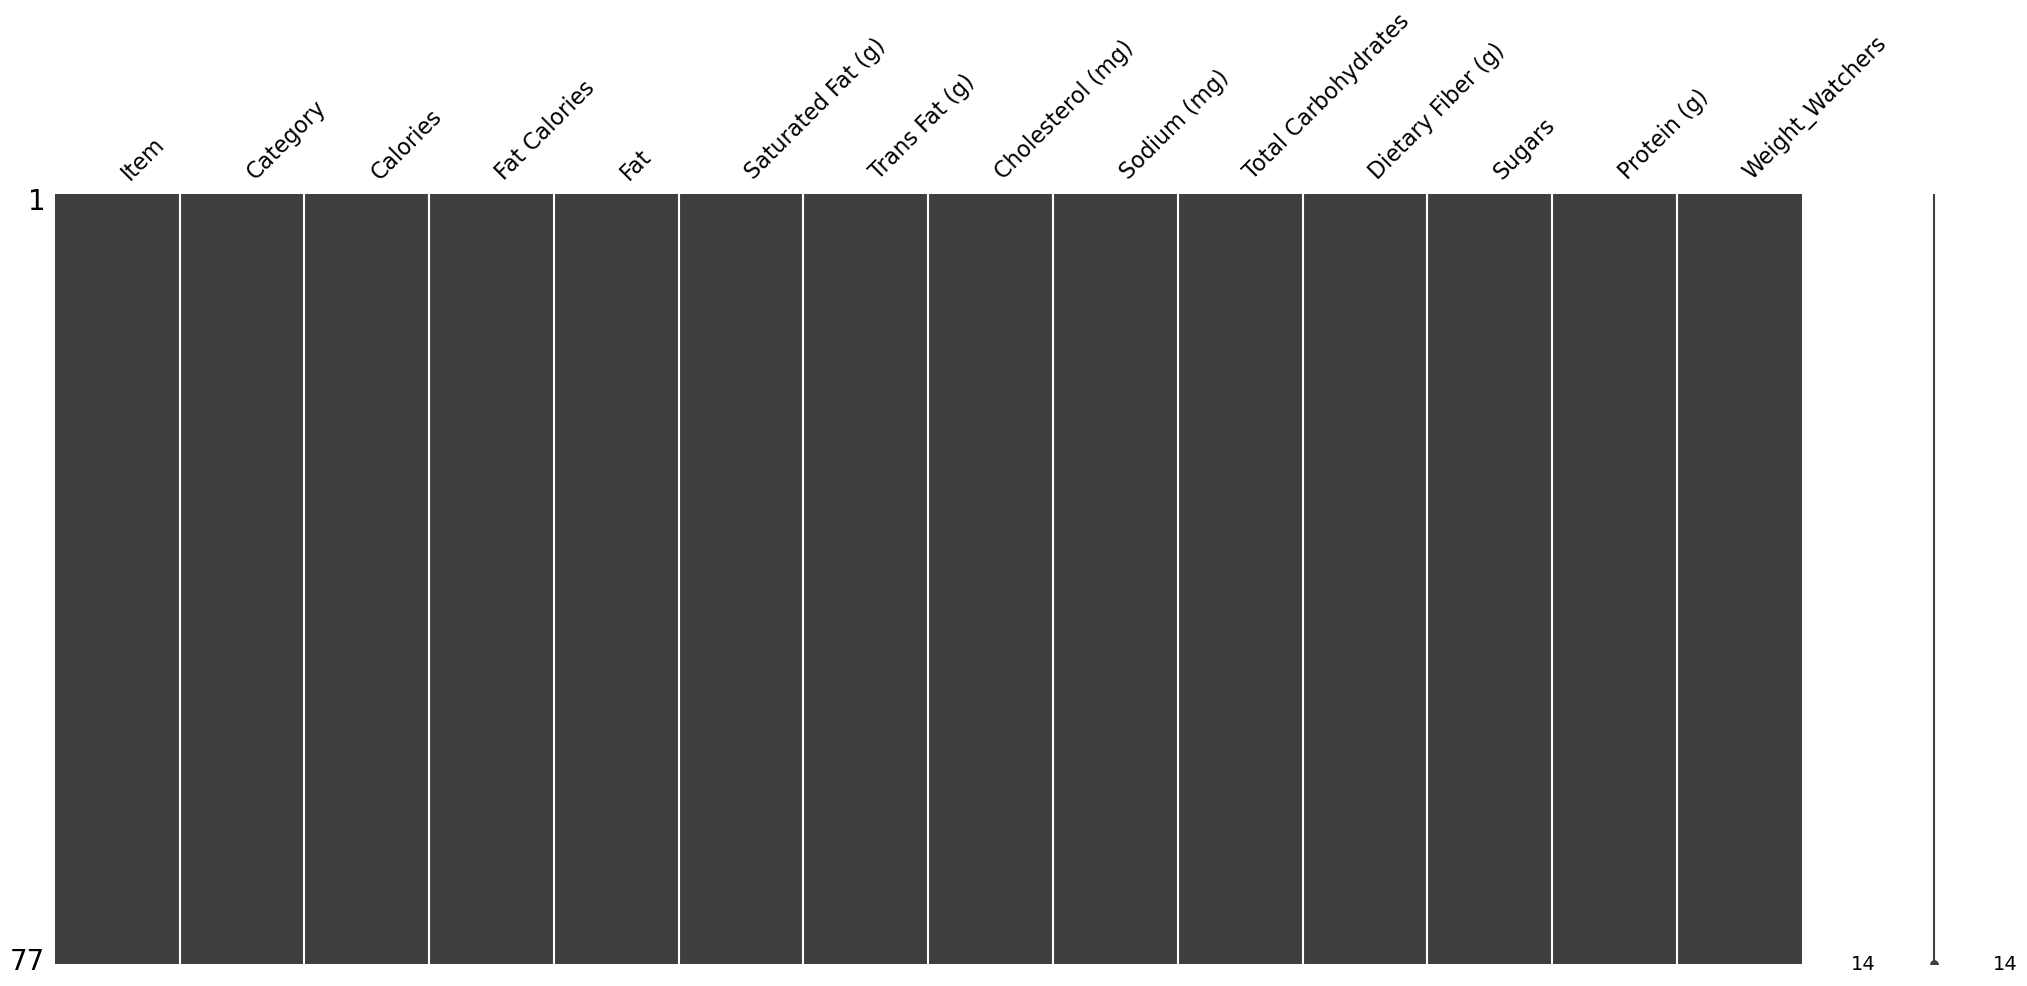

In [4]:
# to check the general picture of missing value in the data
ms.matrix(menu)

In [5]:

# data = menu.fillna('') # replace missing values with '' as 
# data  

In [6]:
#ms.matrix(data)

In [7]:
# data.shape


menu.Category.unique()

array(['Burgers', 'Chicken', 'Breakfast'], dtype=object)

<AxesSubplot:>

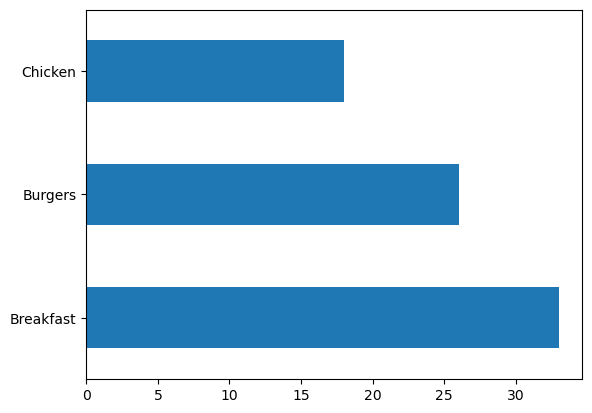

In [59]:
menu['Category'].value_counts()[:10].plot(kind='barh')# counting the first 10 row of the menu


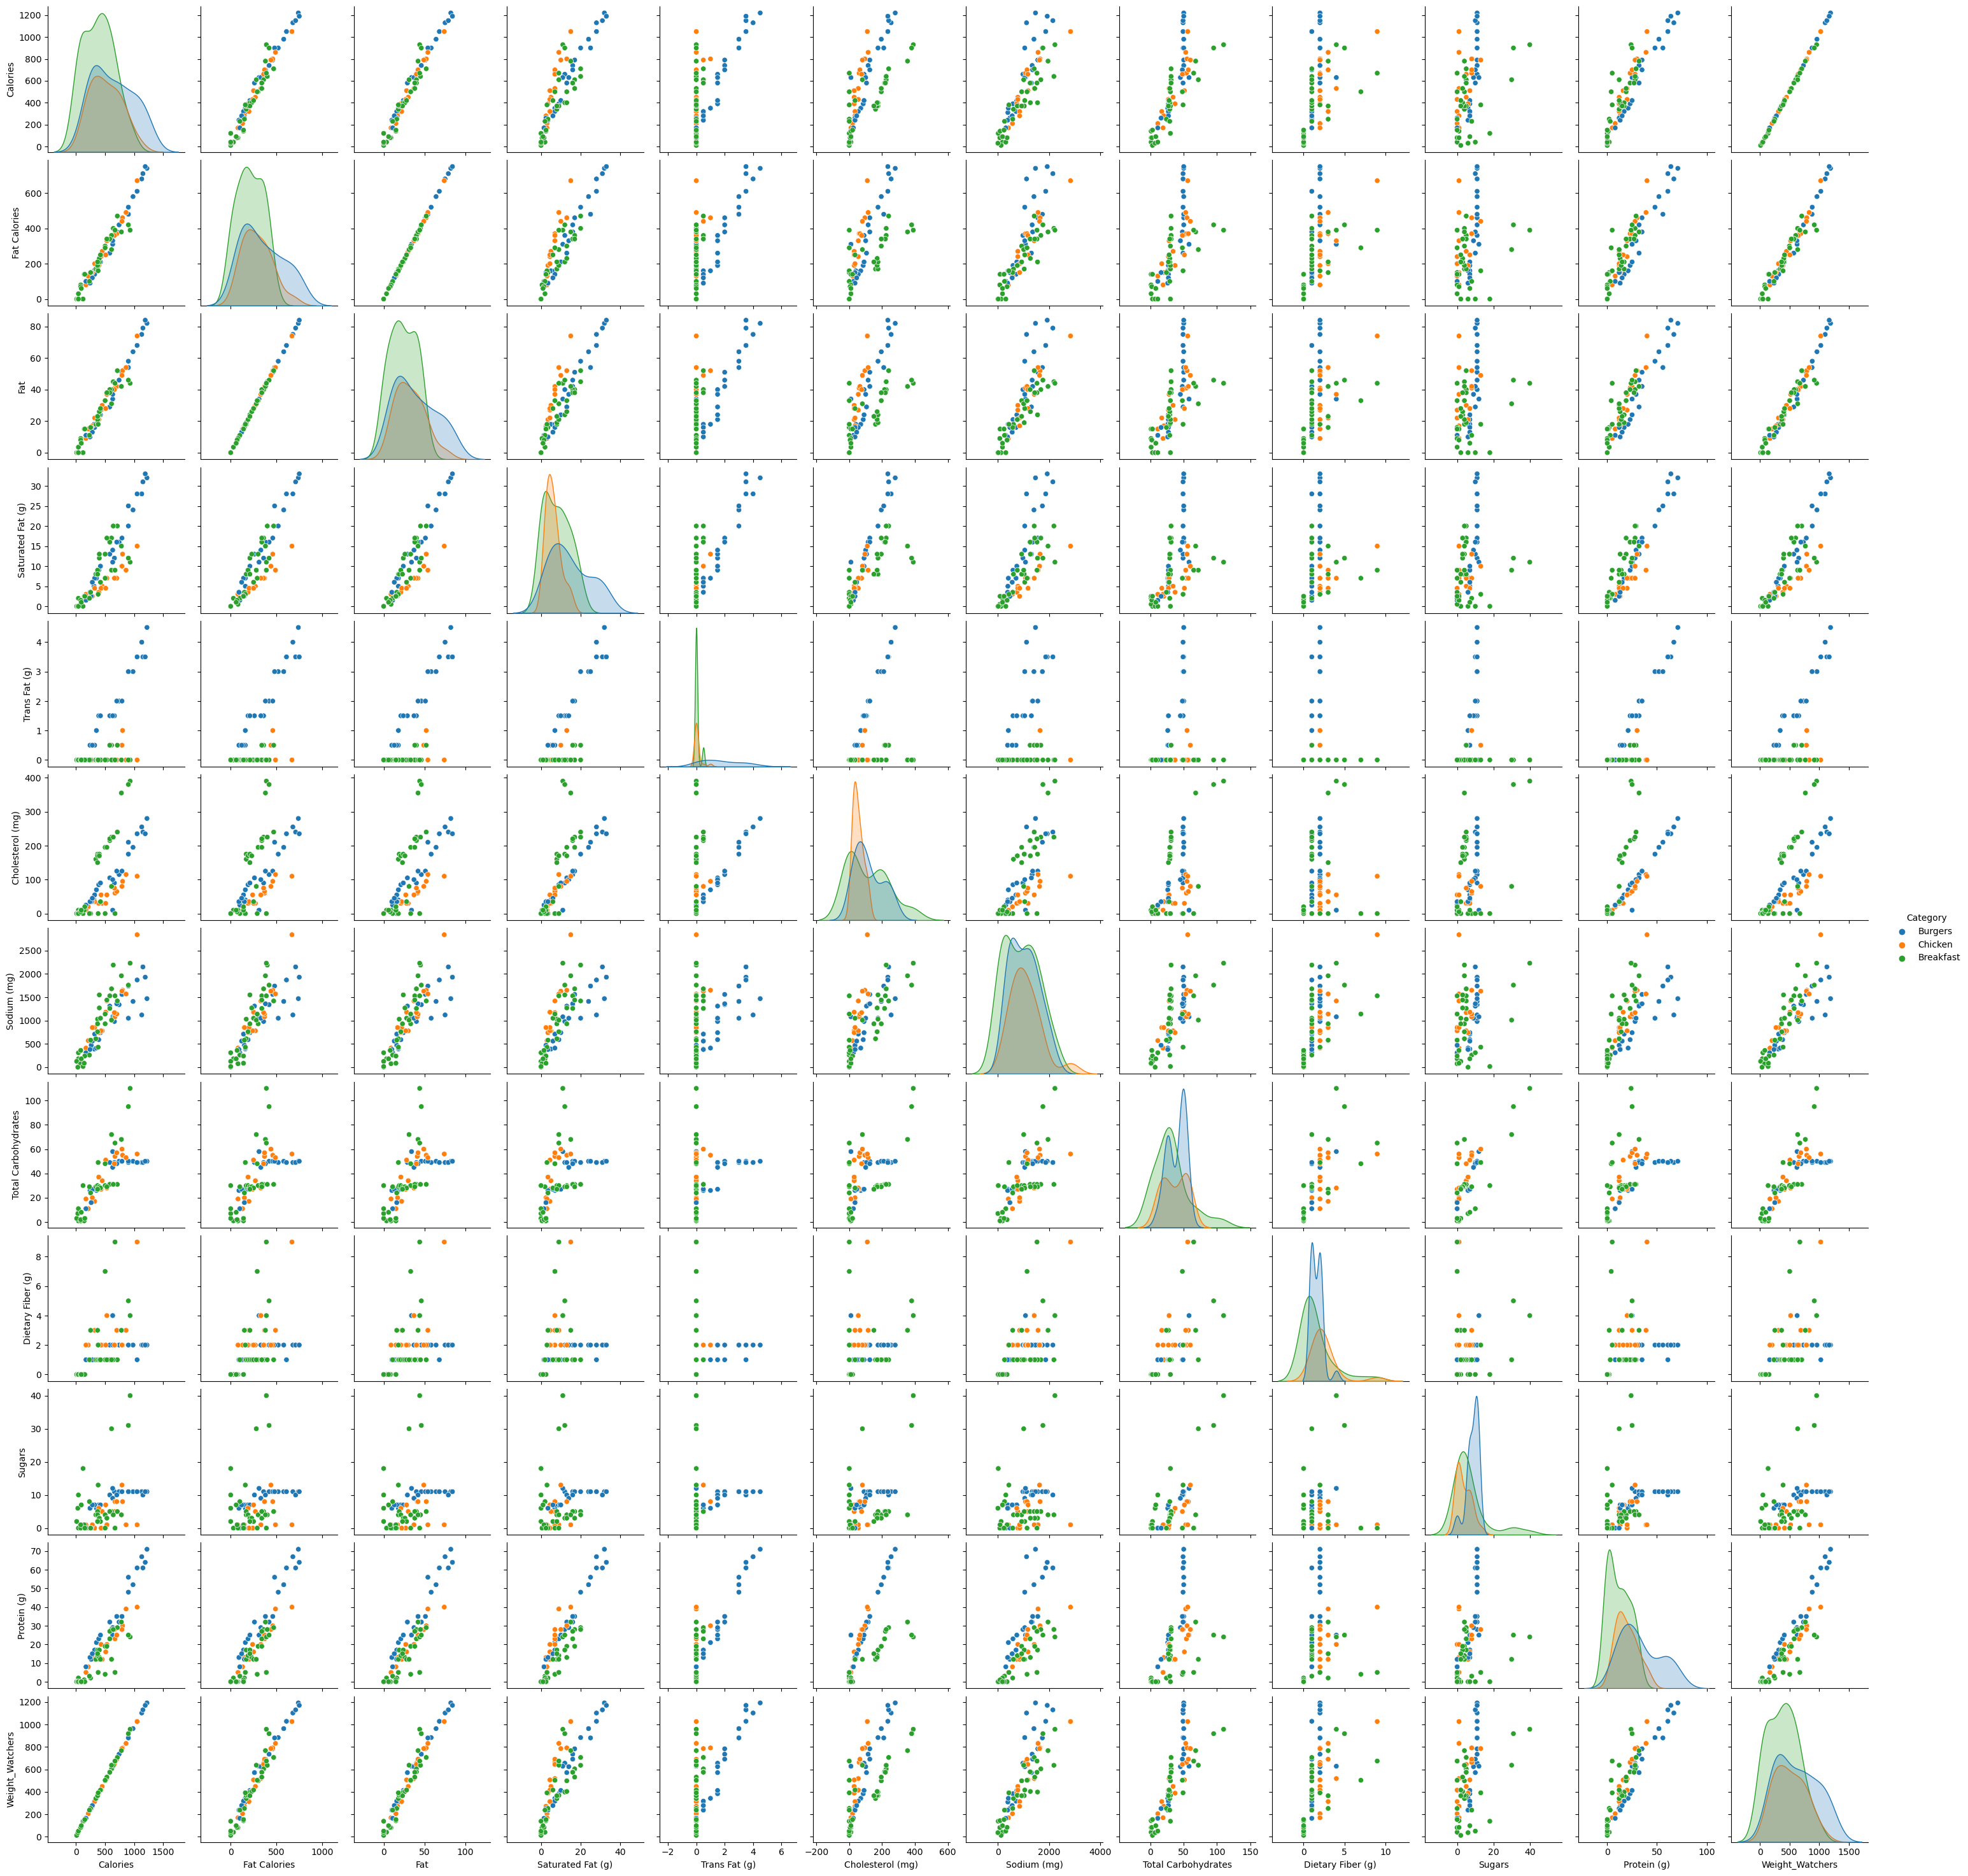

In [56]:
# pairplotting to check the distribution of nutrients
# sns.pairplot(menu)
# plt.show()
sns.pairplot(data=menu, hue="Category")

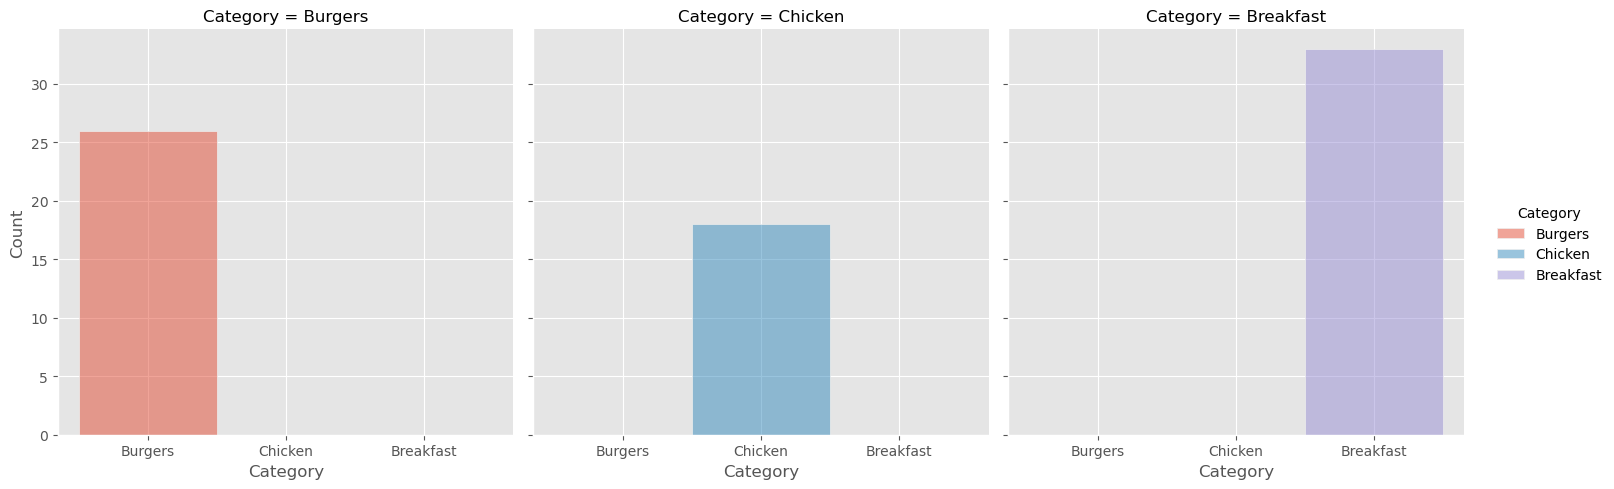

In [79]:
sns.displot(data=menu, x="Category", hue="Category", col="Category")



# Analayzing the food items  which is highly consumed by clients

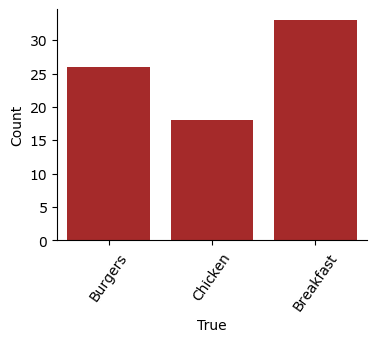

In [38]:
plt.style.use('default')
plt.figure(figsize=(4,3),edgecolor='0.3',dpi=100)
a=sns.countplot(x='Category',facecolor='brown', data=menu )

xticks=plt.xticks(rotation=55, family='verdana')
yticks=plt.yticks(family='verdana')

plt.xlabel(menu['Category'].all())
plt.ylabel('Count')

a.spines['bottom'].set_color('black')
a.spines['left'].set_color('black')

sns.despine()



# Analyzing of items per category

In [11]:
px.density_heatmap(x='Category', y='Item', data_frame=menu, width=1000)




# Analysis of nutrients

calculating the average distribution of calories for each categories

In [60]:
calories=pd.DataFrame(menu.groupby('Category')['Calories'].mean())
colors=['black']*9
colors[1]='#245CC5'
fig= go.Figure(data=[go.Bar(x=calories.index,
                          y=calories['Calories'],
                          marker_color= colors)])

fig.update_layout(width=500, height=500 )
fig.update_yaxes(title='Average Calories')
fig.update_xaxes(title='Category')
fig.show()



In [61]:
Fats=pd.DataFrame(menu.groupby('Category')['Fat'].mean())
colors=['black']*9
colors[1]='#09761F'
fig= go.Figure(data=[go.Bar(x=Fats.index,
                          y=Fats['Fat'],
                          marker_color= colors)])

fig.update_layout(width=500, height=500 )
fig.update_yaxes(title='Average Fat')
fig.update_xaxes(title='Category')
fig.show()

In [62]:
sodium=pd.DataFrame(menu.groupby('Category')['Sodium (mg)'].mean())
colors=['black']*9
colors[2]='#C53A24'
fig= go.Figure(data=[go.Bar(x=sodium.index,
                          y=sodium['Sodium (mg)'],
                          marker_color= colors)])

fig.update_layout(width=500, height=500 )
fig.update_yaxes(title='Sodium (mg)')
fig.update_xaxes(title='Category')
fig.show()



In [63]:
sugar=pd.DataFrame(menu.groupby('Category')['Sugars'].mean())
colors=['black']*3
colors[1]='#0FF1F1'
fig= go.Figure(data=[go.Bar(x=sugar.index,
                          y=sugar['Sugars'],
                          marker_color= colors)])

fig.update_layout(width=500, height=500 )
fig.update_yaxes(title='Average Sugar')
fig.update_xaxes(title='Category')
fig.show()



In [68]:
protien=pd.DataFrame(menu.groupby('Category')['Protein (g)'].mean())
colors=['black']*2
colors[1]='#D19111'
fig= go.Figure(data=[go.Bar(x=protien.index,
                          y=protien['Protein (g)'],
                          marker_color= colors)])

fig.update_layout(width=500, height=500 )
fig.update_yaxes(title='Average protien')
fig.update_xaxes(title='Category')
fig.show()



In [67]:

Cholesterol=pd.DataFrame(menu.groupby('Category')['Cholesterol (mg)'].mean())
colors=['black']*2
colors[1]='#9111D1'
fig= go.Figure(data=[go.Bar(x=Cholesterol.index,
                          y=Cholesterol['Cholesterol (mg)'],
                          marker_color= colors)])

fig.update_layout(width=500, height=500 )
fig.update_yaxes(title='Average Cholesterol')
fig.update_xaxes(title='Category')




In [66]:
# Total Carbohydrates

Carbohydrates=pd.DataFrame(menu.groupby('Category')['Total Carbohydrates'].mean())
colors=['black']*2
colors[1]='#5F1212'
fig= go.Figure(data=[go.Bar(x=Carbohydrates.index,
                          y=Carbohydrates['Total Carbohydrates'],
                          marker_color= colors)])

fig.update_layout(width=500, height=500 )
fig.update_yaxes(title='Average Carbohydrates')
fig.update_xaxes(title='Category')

# Analyzing the relationship between carbohydrates and sugar

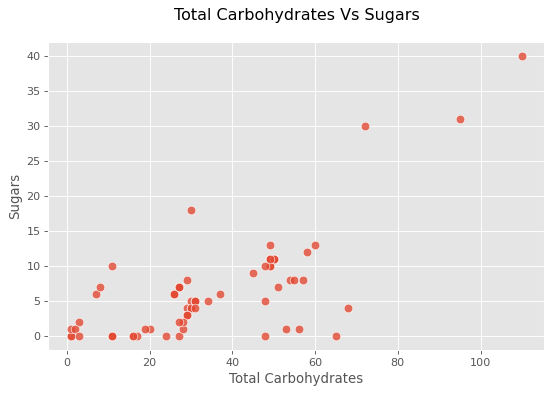

In [70]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5), dpi=80)
sns.scatterplot(x='Total Carbohydrates', y='Sugars',data=menu, alpha=0.8, s=60)
plt.title('Total Carbohydrates Vs Sugars', x=0.5, y=1.05)
plt.show()


# Averag nutrient analysis for each categories

In [20]:
menu.columns

Index(['Item', 'Category', 'Calories', 'Fat Calories', 'Fat',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Total Carbohydrates', 'Dietary Fiber (g)', 'Sugars', 'Protein (g)',
       'Weight_Watchers'],
      dtype='object')

In [21]:
cols=['Sodium (mg)','Total Carbohydrates','Dietary Fiber (g)','Sugars',
      'Protein (g)', 'Trans Fat (g)','Cholesterol (mg)',
      'Calories','Fat Calories','Fat','Saturated Fat (g)'
     ]

table= menu.pivot_table(columns='Category', values=cols)
table.style.background_gradient(cmap='viridis')

In [22]:
# scatterplot of each analysis

In [23]:
import plotly.express as px
#menu = px.data.menu()
fig = px.scatter(menu, x='Fat', y='Cholesterol (mg)',size='Calories',
                 color='Category',marginal_y='violin', hover_name='Item',
           marginal_x='box', trendline="ols", template='plotly_dark')
fig.show()

In [24]:
fig = px.scatter(menu, x= 'Total Carbohydrates', y='Sugars',size='Calories',
                 color='Category',marginal_y='violin', hover_name='Item',
           marginal_x='box', trendline="ols", template='plotly_dark')
fig.show()

In [25]:
fig = px.scatter(menu, x= 'Total Carbohydrates', y='Protein (g)',size='Calories',
                 color='Category',marginal_y='violin', hover_name='Item',
           marginal_x='box', trendline="ols", template='plotly_dark')
fig.show()

In [26]:
fig = px.scatter(menu, x= 'Protein (g)', y='Sugars',size='Calories',
                 color='Category',marginal_y='violin', hover_name='Item',
           marginal_x='box', trendline="ols", template='plotly_dark')
fig.show()

In [27]:
fig = px.scatter(menu, x= 'Dietary Fiber (g)', y='Saturated Fat (g)',size='Calories',
                 color='Category',marginal_y='violin', hover_name='Item',
           marginal_x='box', trendline="ols", template='plotly_dark')
fig.show()

In [28]:
# Analysing diet plans based on the food's overall nutrients



# Analyzing  items with highest amount of nutrients

For burger

In [29]:
burger=menu[menu['Category']=='Burgers']
cols=['Calories', 'Fat Calories', 'Fat',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Total Carbohydrates', 'Dietary Fiber (g)', 'Sugars', 'Protein (g)']
for col in cols:
    print(col)
    a=burger.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Triple Whopper® Sandwich with Cheese    1220.0
Name: Calories, dtype: float64
----------------------------------------


Fat Calories
Item
Cheddar Bacon King Sandwich    750.0
Name: Fat Calories, dtype: float64
----------------------------------------


Fat
Item
Cheddar Bacon King Sandwich    84.0
Name: Fat, dtype: float64
----------------------------------------


Saturated Fat (g)
Item
Cheddar Bacon King Sandwich    33.0
Name: Saturated Fat (g), dtype: float64
----------------------------------------


Trans Fat (g)
Item
Triple Whopper® Sandwich with Cheese    4.5
Name: Trans Fat (g), dtype: float64
----------------------------------------


Cholesterol (mg)
Item
Triple Whopper® Sandwich with Cheese    280.0
Name: Cholesterol (mg), dtype: float64
----------------------------------------


Sodium (mg)
Item
Bacon King Sandwich    2150.0
Name: Sodium (mg), dtype: float64
----------------------------------------


Total Carbohydrates
Item
IMPOSSIBLE Whopper® Sandwich    58.

For breakfast

In [30]:
breakfast=menu[menu['Category']=='Breakfast']
cols=['Calories', 'Fat Calories', 'Fat',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Total Carbohydrates', 'Dietary Fiber (g)', 'Sugars', 'Protein (g)']
for col in cols:
    print(col)
    a=breakfast.groupby('Item')[col].max().sort_values(ascending=False).head(2)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
BK™ Ultimate Breakfast Platter              930.0
NY Ultimate Platter (Regional menu item)    900.0
Name: Calories, dtype: float64
----------------------------------------


Fat Calories
Item
Double CROISSAN’WICH® with Sausage          470.0
NY Ultimate Platter (Regional menu item)    420.0
Name: Fat Calories, dtype: float64
----------------------------------------


Fat
Item
Double CROISSAN’WICH® with Sausage          52.0
NY Ultimate Platter (Regional menu item)    46.0
Name: Fat, dtype: float64
----------------------------------------


Saturated Fat (g)
Item
Double CROISSAN’WICH® with Sausage    20.0
Fully Loaded Biscuit                  20.0
Name: Saturated Fat (g), dtype: float64
----------------------------------------


Trans Fat (g)
Item
Fully Loaded CROISSAN’WICH®                   0.5
Double CROISSAN’WICH® with Sausage & Bacon    0.5
Name: Trans Fat (g), dtype: float64
----------------------------------------


Cholesterol (mg)
Item
BK™ Ultimate Breakfast Platt

For chicken

In [31]:
chicken=menu[menu['Category']=='Chicken']
cols=['Calories', 'Fat Calories', 'Fat',
       'Saturated Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)',
       'Total Carbohydrates', 'Dietary Fiber (g)', 'Sugars', 'Protein (g)']
for col in cols:
    print(col)
    a=chicken.groupby('Item')[col].max().sort_values(ascending=False).head(1)
    print(a)
    print('-'*40)
    print('\n')

Calories
Item
Spicy Chicken Nuggets- 20 pc    1050.0
Name: Calories, dtype: float64
----------------------------------------


Fat Calories
Item
Spicy Chicken Nuggets- 20 pc    670.0
Name: Fat Calories, dtype: float64
----------------------------------------


Fat
Item
Spicy Chicken Nuggets- 20 pc    74.0
Name: Fat, dtype: float64
----------------------------------------


Saturated Fat (g)
Item
Spicy Chicken Nuggets- 20 pc    15.0
Name: Saturated Fat (g), dtype: float64
----------------------------------------


Trans Fat (g)
Item
Bacon & Cheese Crispy Chicken Sandwich    1.0
Name: Trans Fat (g), dtype: float64
----------------------------------------


Cholesterol (mg)
Item
Chicken Nuggets- 20pc    115.0
Name: Cholesterol (mg), dtype: float64
----------------------------------------


Sodium (mg)
Item
Spicy Chicken Nuggets- 20 pc    2840.0
Name: Sodium (mg), dtype: float64
----------------------------------------


Total Carbohydrates
Item
BBQ Bacon Crispy Chicken Sandwich    60.0
Na

In [75]:
WW=pd.DataFrame(menu.groupby('Category')['Weight_Watchers'].max())
colors=['black']*9
colors[1]='#245CC5'
fig= go.Figure(data=[go.Bar(x=WW.index,
                          y=WW['Weight_Watchers'],
                          marker_color= colors)])

fig.update_layout(width=500, height=500)
fig.update_yaxes(title='Maximum  Weight Watchers')
fig.update_xaxes(title='Category')
fig.show()

Analyzing diet plans based on Weight Watchers of overall nutrients.
 

In [33]:

# Chi_square test to check if burger has effect on weight watcher

Ho = "Burger has an effect on Weight Watchers"   # Null Hypothesis
Ha = "Burger has not effect on Weight Watchers"   # Alternate Hypothesis

crosstab = pd.crosstab((menu['Category']=='Burgers'),menu['Weight_Watchers']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Burger has an effect on Weight Watchers as the p_value (0.527) > 0.05


Weight_Watchers  12.0    36.0    40.0    50.0    81.0    83.0    98.0    \
Category                                                                  
False                 1       1       1       1       1       1       1   
True                  0       0       0       0       0       0       0   

Weight_Watchers  138.0   143.0   153.0   ...  883.0   918.0   957.0   963.0   \
Category                                 ...                                   
False                 1       1       1  ...       0       1       1       0   
True                  0       0       0  ...       1       0       0       1   

Weight_Watchers  1026.0  1028.0  1102.0  1130.0  1170.0  1192.0  
Category                                                         
False                 1       0       0       0       0       0  
True                  0       1       1       1       1       1  

[2 rows x 72 columns]

In [71]:
# Chi_square test to check if burger has effect on weight watcher

Ho = "Chicken has an effect on Weight Watchers"   # Null Hypothesis
Ha = "Chicken has not effect on Weight Watchers"   # Alternate Hypothesis

crosstab = pd.crosstab((menu['Category']=='Chicken'),menu['Weight_Watchers']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Chicken has an effect on Weight Watchers as the p_value (0.464) > 0.05


Weight_Watchers  12.0    36.0    40.0    50.0    81.0    83.0    98.0    \
Category                                                                  
False                 1       1       1       1       1       1       1   
True                  0       0       0       0       0       0       0   

Weight_Watchers  138.0   143.0   153.0   ...  883.0   918.0   957.0   963.0   \
Category                                 ...                                   
False                 1       1       1  ...       1       1       1       1   
True                  0       0       0  ...       0       0       0       0   

Weight_Watchers  1026.0  1028.0  1102.0  1130.0  1170.0  1192.0  
Category                                                         
False                 0       1       1       1       1       1  
True                  1       0       0       0       0       0  

[2 rows x 72 columns]

In [76]:
Ho = "Breakfast has high Calorie"   # Null Hypothesis
Ha = "Breakfast has less high Calorie"   # Alternate Hypothesis

crosstab = pd.crosstab((menu['Category']=='Breakfast'),menu['Calories']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Breakfast has high Calorie as the p_value (0.058) > 0.05
